In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from STLayer import STLayer
style.use('seaborn-dark')

## Read data and create STLayer object

In [1]:
def getCoordinates(df):
    """
    Extracts spatial coordinates from ST data with index in 'AxB' type format.
    
    Return: pandas dataframe of coordinates
    """
    coor = []
    for spot in df.index:
        coordinates = spot.split('x')
        coordinates = [float(i) for i in coordinates]
        coor.append(coordinates)
    return coor

In [3]:
layer1_path = "../breast_cancer_data/Layer1_BC_count_matrix-1.tsv"
layer2_path = "../breast_cancer_data/Layer2_BC_count_matrix-1.tsv"
layer3_path = "../breast_cancer_data/Layer3_BC_count_matrix-1.tsv"
layer1_raw_df = pd.read_csv(layer1_path, sep="\t", index_col=0)
layer2_raw_df = pd.read_csv(layer2_path, sep="\t", index_col=0)
layer3_raw_df = pd.read_csv(layer3_path, sep="\t", index_col=0)


layer1 = STLayer(layer1_raw_df, getCoordinates(layer1_raw_df))
layer2 = STLayer(layer2_raw_df, getCoordinates(layer2_raw_df))
layer3 = STLayer(layer3_raw_df, getCoordinates(layer3_raw_df))

In [4]:
layer1.gene_exp

,GAPDH,UBE2G2,MAPKAPK2,NDUFA7,ASNA1,CLASP1,INAFM1,MCL1,AP1G1,SEMA3B,...,KRT39,LBHD1,FAM71E1,SPEF1,SPO11,ZC3HAV1L,MEI4,VCX3B,FAM19A5,FCRL6
13.064x6.086,12,0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.116x7.015,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.945x6.999,15,1,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.987x7.011,8,0,0,0,1,0,0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
15.011x7.984,4,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21.953x24.847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.98x24.963,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.063x24.964,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19.007x25.045,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
layer1.coordinates

array([[13.064,  6.086],
       [12.116,  7.015],
       [13.945,  6.999],
       [12.987,  7.011],
       [15.011,  7.984],
       [12.05 ,  8.018],
       [13.048,  7.992],
       [13.917,  7.99 ],
       [17.979,  8.976],
       [12.087,  9.011],
       [13.035,  8.988],
       [18.96 ,  8.988],
       [14.006,  8.991],
       [16.959,  8.987],
       [15.026,  9.034],
       [15.891,  9.021],
       [10.832,  9.842],
       [20.017,  9.935],
       [18.881,  9.944],
       [13.989,  9.976],
       [17.947,  9.973],
       [13.05 ,  9.981],
       [12.087,  9.969],
       [17.083,  9.985],
       [15.932,  9.991],
       [15.023,  9.995],
       [10.839, 10.825],
       [21.901, 10.865],
       [12.052, 10.965],
       [17.961, 10.952],
       [20.978, 10.943],
       [20.022, 10.956],
       [16.953, 10.961],
       [14.99 , 10.969],
       [15.938, 10.973],
       [13.023, 10.971],
       [13.944, 10.971],
       [18.963, 10.983],
       [10.771, 11.828],
       [21.919, 11.831],


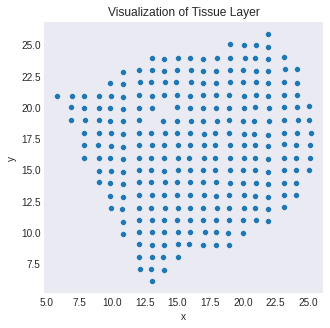

In [6]:
layer1.plot()

## Run PASTE

In [7]:
from PASTE import pairwise_align, center_align

Preprocess gene expression matrices

In [8]:
layer1.filter_genes(15)
layer2.filter_genes(15)
layer3.filter_genes(15)

Pairwise Alignment

In [9]:
pi = pairwise_align(layer1, layer2)

In [10]:
pd.DataFrame(pi)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.003937,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000047,0.003890,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.003937,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000094,0.003843,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00389,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000094,0.0,0.003796,0.000047,0.000000
250,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.003937,0.000000
251,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000141,0.003608,0.0,0.000000,0.0,0.000188,0.000000,0.000000
252,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.003561,0.000000,0.000376,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Center Alignment

In [11]:
layers = [layer1, layer2, layer3]
initial_layer = layer1
lmbda = len(layers)*[1/len(layers)]

In [12]:
W, H = center_align(initial_layer, layers, lmbda)

Iteration: 0


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 1.4538147916013195
Iteration: 1


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 0.0650130648427314
Iteration: 2


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 0.0012613866836639342
Iteration: 3


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 0.00014782440398608543


In [13]:
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.077568,0.000000,1.571736,0.000000,0.107199,0.011266,0.032247,0.011866,0.171291,0.007268,0.118881,0.045988,0.204350,0.115079,0.000000
1,0.000000,0.000000,0.803095,0.000000,0.000000,0.057368,0.047069,0.000000,0.445300,0.103989,0.413137,0.000000,0.167680,0.615286,0.254974
2,0.004316,0.000000,0.746650,0.007613,0.000000,0.198599,0.022621,0.000000,0.398442,0.097102,0.189777,0.000000,0.324370,1.100093,0.273822
3,0.000000,0.000000,1.641055,0.000000,0.099718,0.286153,0.000000,0.000000,0.144810,0.156996,0.000000,0.034814,0.105201,0.231861,0.000000
4,0.074317,0.853370,2.324887,0.136745,0.000000,0.501722,0.000000,0.034072,0.000000,0.019573,0.096948,0.007440,0.102572,0.200959,0.199763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.047977,0.000000,0.044622,0.000000,0.049792,0.000000,0.020265,0.000000,0.003471,0.000000,0.007280,0.000000,0.173906,0.092812,0.000000
250,0.000000,0.135265,0.093080,0.000000,0.033856,0.000000,0.017607,0.134847,0.000000,0.000000,0.000000,0.002885,0.253111,0.002978,0.060291
251,0.018022,0.000000,0.041330,0.000000,0.013231,0.000000,0.009790,0.000000,0.000000,0.022576,0.076341,0.002464,0.231442,0.006226,0.031232
252,0.081793,0.010005,0.143564,0.050954,0.026352,0.000000,0.029213,0.000000,0.027815,0.001983,0.012828,0.008026,0.286021,0.075984,0.076304


In [14]:
pd.DataFrame(H)

,0,1,2,3,4,5,6,7,8,9,...,6688,6689,6690,6691,6692,6693,6694,6695,6696,6697
0,0.100690,0.008369,0.162530,0.000000,0.365378,0.948104,0.000000,0.445338,0.129932,0.000000,...,0.066630,0.030475,0.230781,0.049551,0.000000,0.132138,0.088157,0.189482,0.096391,0.279447
1,0.000000,0.062478,0.021486,0.087408,0.000000,0.398815,0.000000,0.000000,0.092872,0.028219,...,0.025973,0.053251,0.046108,0.040384,0.015151,0.043111,0.000000,0.063020,0.000708,0.021112
2,0.039300,0.018152,0.016507,0.000000,0.000000,0.455662,0.040436,0.000000,0.154916,0.044595,...,0.068007,0.045785,0.082429,0.000937,0.000000,0.052417,0.018348,0.011784,0.045268,0.000000
3,0.069170,0.293153,0.000000,0.020386,0.675923,0.975237,0.041308,0.687235,0.000000,0.052994,...,0.086358,0.000000,0.113931,0.000000,0.064169,0.011848,0.083903,0.071923,0.069444,0.039606
4,0.121083,0.138468,0.072135,0.028516,0.214414,1.781175,0.133409,0.000000,0.166196,0.121332,...,0.029164,0.026146,0.000000,0.087528,0.021616,0.090379,0.000000,0.237111,0.015712,0.027354
5,0.402984,0.284590,0.284026,0.235735,0.658080,3.309679,0.000000,0.000000,0.470348,0.000000,...,0.152773,0.000000,0.359295,0.205549,0.059342,0.000000,0.000000,0.419721,0.631653,0.000000
6,0.428703,0.429851,0.738493,0.366952,0.054936,4.470573,0.334257,1.078017,0.000000,0.031835,...,0.000000,0.121106,0.397712,0.000000,1.232426,0.526841,0.000000,0.712172,0.442280,0.931929
7,0.012008,0.124433,0.148087,0.034373,0.150452,0.812712,0.000000,0.000000,0.395433,0.023719,...,0.233222,0.020408,0.152578,0.039257,0.031272,0.020215,0.015733,0.025316,0.063104,0.171968
8,0.087717,0.168688,0.100330,0.012420,0.726942,0.688783,0.000000,0.000000,0.123997,0.014030,...,0.151458,0.037030,0.327569,0.038317,0.009323,0.121247,0.000000,0.015959,0.179446,0.000000
9,0.168391,0.036216,0.139377,0.000000,0.438996,0.000000,0.000000,0.047862,0.299890,0.000000,...,0.000000,0.000000,0.069214,0.024502,0.059355,0.054304,0.126104,0.000000,0.282022,0.323540
